### 載入和探索Cifar-10彩色圖片資料集

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(f"X_train shape : {X_train.shape}")
print(f"Y_train shape : {Y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"Y_test shape : {Y_test.shape}")

X_train shape : (50000, 32, 32, 3)
Y_train shape : (50000, 1)
X_test shape : (10000, 32, 32, 3)
Y_test shape : (10000, 1)


In [5]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [7]:
Y_train[0]

array([6], dtype=uint8)

上述執行結果是 6 (即青蛙)。

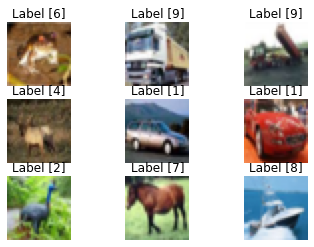

In [10]:
import matplotlib.pyplot as plt

for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap = "binary")
    plt.title(f"Label {Y_train[i]}")
    plt.axis("off")
plt.show()

In [22]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

seed = 10
np.random.seed(seed)

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Y_test_bk = Y_test.copy() # 備份原始標籤資料作後續分析使用
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), padding = "same", input_shape = X_train.shape[1:], activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# 模型摘要資訊
model.summary()

# 編譯模型
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,   epochs=9,   batch_size=128,   verbose=2)

# 評估與儲存模型
loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練集的準確度 : {accuracy : .4f}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試集的準確度 : {accuracy : .4f}")

print("Saving Model as cifar10.h5")
model.save("cifar10.h5")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

執行結果，訓練資料及測試資料的準確度分別為 77.10% 與 70.08%。

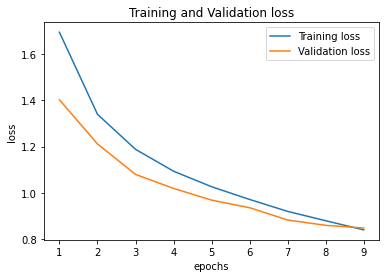

In [23]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

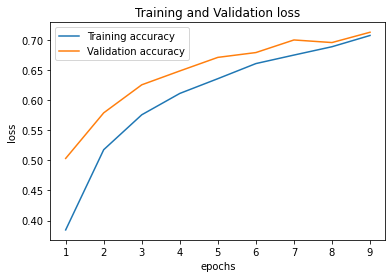

In [25]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

由圖表可以看出，隨著周期的增加，訓練損失與驗證損失都是持續的下降；訓練準確度與驗證準確度都是持續的增加。

### 預測結果分析

In [9]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import pandas as pd

seed = 10
np.random.seed(seed)

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Y_test_bk = Y_test.copy() # 備份原始標籤資料作後續分析使用
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試集準確度 : {accuracy * 100 :0.2f} %")

Y_pred = model.predict_classes(X_test)
# 彩色圖片轉換 Y_test_bk.astype(int).flatten()，不是只加.astype(int)
tb = pd.crosstab(Y_test_bk.astype(int).flatten(), Y_pred.astype(int), rownames = ["label"], colnames = ["predict"])

print(tb)

313/313 [==============================] - 2s 7ms/step - loss: 0.8596 - accuracy: 0.7008
測試集準確度 : 70.08%


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        661   23   56   25   40    8   20   14  102   51
1          9  827    6   12    2    5   19    3   24   93
2         48    9  461   59  148   93  123   35   14   10
3          8    6   42  455   87  200  124   42   17   19
4         10    4   27   44  693   40   94   74   13    1
5          7    3   16  146   78  650   40   44    8    8
6          1    3   19   37   35   21  873    4    4    3
7          8    2   15   24   75   78   11  774    2   11
8         39   44    6   15   22    7   11    5  823   28
9         17   86    4   22    6   10   12   21   31  791


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


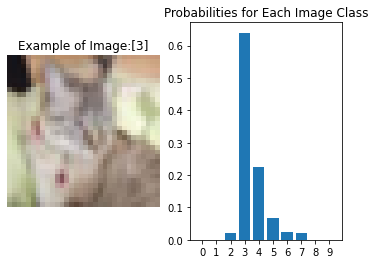

分類錯誤的資料
      label  predict
3         0        8
15        8        6
21        0        2
22        4        0
24        5        4
...     ...      ...
9987      0        8
9989      2        4
9993      5        3
9995      8        3
9996      3        5

[2992 rows x 2 columns]


In [28]:
import matplotlib

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# i = np.random.randint(0 , len(X_test))
i=8 # 此處直接指定索引值是 8 的資料
img = X_test[i]
# 將圖片轉換成 4D 張量
X_test_img = X_test[i].reshape(1, 32, 32, 3).astype("float32")
#執行正規化
X_test_img = X_test_img / 255
X_test = X_test.astype("float32") / 255

# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")

probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

Y_probs = model.predict_proba(X_test)
Y_test = Y_test.flatten()
df = pd.DataFrame({"label": Y_test, "predict":Y_pred})
df = df[Y_test != Y_pred]
print("分類錯誤的資料")
print(df)